# Second Phase Evaluation Project - Global Power Plant Database

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:
    
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	 estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

    Fuel Type Aggregation
    
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Dataset Link-

•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [48]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [49]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [50]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


As we've seen before that in the present columns, there is only 1 is having cpmplete values. We can also see the missing values present in the dataset.

Therefore, as per observation some datas are also not accurate, it might have skewness present in the dataset.

Also, we can see nan values present in the columns like other_fuel3, wepp_id and some columns have maximum null values. so, we will start with removing these columns then fill some of numerical & categorical columns using meand & mode method

In [51]:
df.drop(["other_fuel3","wepp_id", "estimated_generation_gwh"], axis=1, inplace = True)

In [52]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df["generation_data_source"].fillna(df["generation_data_source"].mode()[0])
df["owner"].fillna(df["owner"].mode()[0])

0                              Solar Paces
1                     Ultratech Cement ltd
2                                      AES
3                              Acc Acc ltd
4                              Acc Acc ltd
                      ...                 
902                            Acc Acc ltd
903    Karnataka Power Corporation Limited
904                            Acc Acc ltd
905                     Hindustan Zinc ltd
906                     iEnergy Wind Farms
Name: owner, Length: 907, dtype: object

In [53]:
df["latitude"].fillna(df["latitude"].mean())
df["longitude"].fillna(df["longitude"].mean())
df["commissioning_year"].fillna(df["commissioning_year"].mean())

0      2011.000000
1      1997.091082
2      1997.091082
3      2004.000000
4      2015.000000
          ...     
902    2016.000000
903    1997.091082
904    1997.091082
905    1997.091082
906    1997.091082
Name: commissioning_year, Length: 907, dtype: float64

In [54]:
df.drop(["other_fuel2","other_fuel1", "year_of_capacity_data"], axis=1, inplace = True)

In [55]:
df.fillna(df.median()[0], inplace=True)

In [56]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [57]:
df[["country","name", "gppd_idnr","primary_fuel"]].value_counts()

country  name                     gppd_idnr   primary_fuel
IND      ACME Solar Tower         WRI1020239  Solar           1
         RAICHUR                  IND0000356  Coal            1
         PRYAGRAJ (BARA) TPP      IND0000346  Coal            1
         PULICHINTALA             IND0000523  Hydro           1
         PUNE MILL                WRI1019978  Coal            1
                                                             ..
         KADANA                   IND0000167  Hydro           1
         KADRA                    IND0000168  Hydro           1
         KAHALGAON                IND0000169  Coal            1
         KAIGA                    IND0000170  Nuclear         1
         iEnergy Theni Wind Farm  WRI1026761  Wind            1
Length: 907, dtype: int64

In [58]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

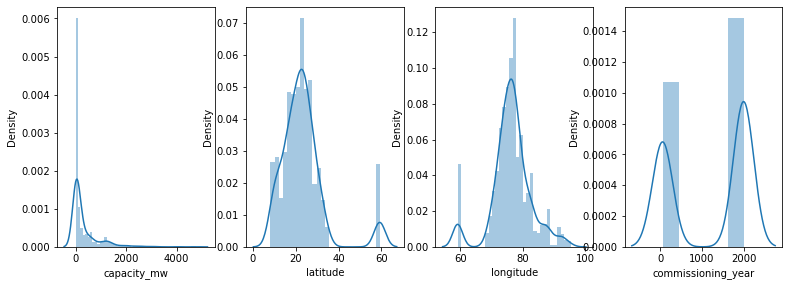

In [59]:
columns=["capacity_mw", "latitude", "longitude", "commissioning_year",]
plt.subplots(figsize=(13, 15))
for i, column in enumerate(columns):
    plt.subplot(3,4, i + 1)
    sns.distplot(df[column])
plt.show()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

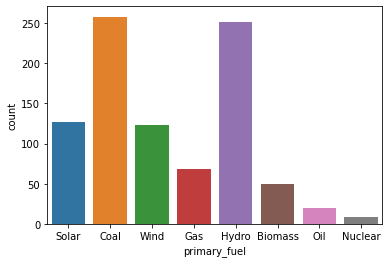

In [60]:
sns.countplot(df["primary_fuel"])
df.primary_fuel.value_counts()

WRI                                     765
Industry About                          119
59.2                                     19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

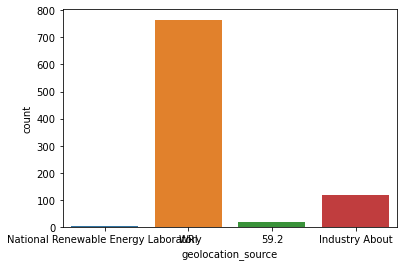

In [61]:
sns.countplot(df["geolocation_source"])
df.geolocation_source.value_counts()

59.2                             458
Central Electricity Authority    449
Name: generation_data_source, dtype: int64

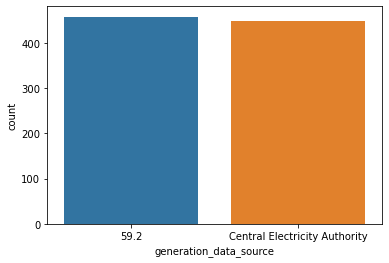

In [62]:
sns.countplot(df["generation_data_source"])
df.generation_data_source.value_counts()

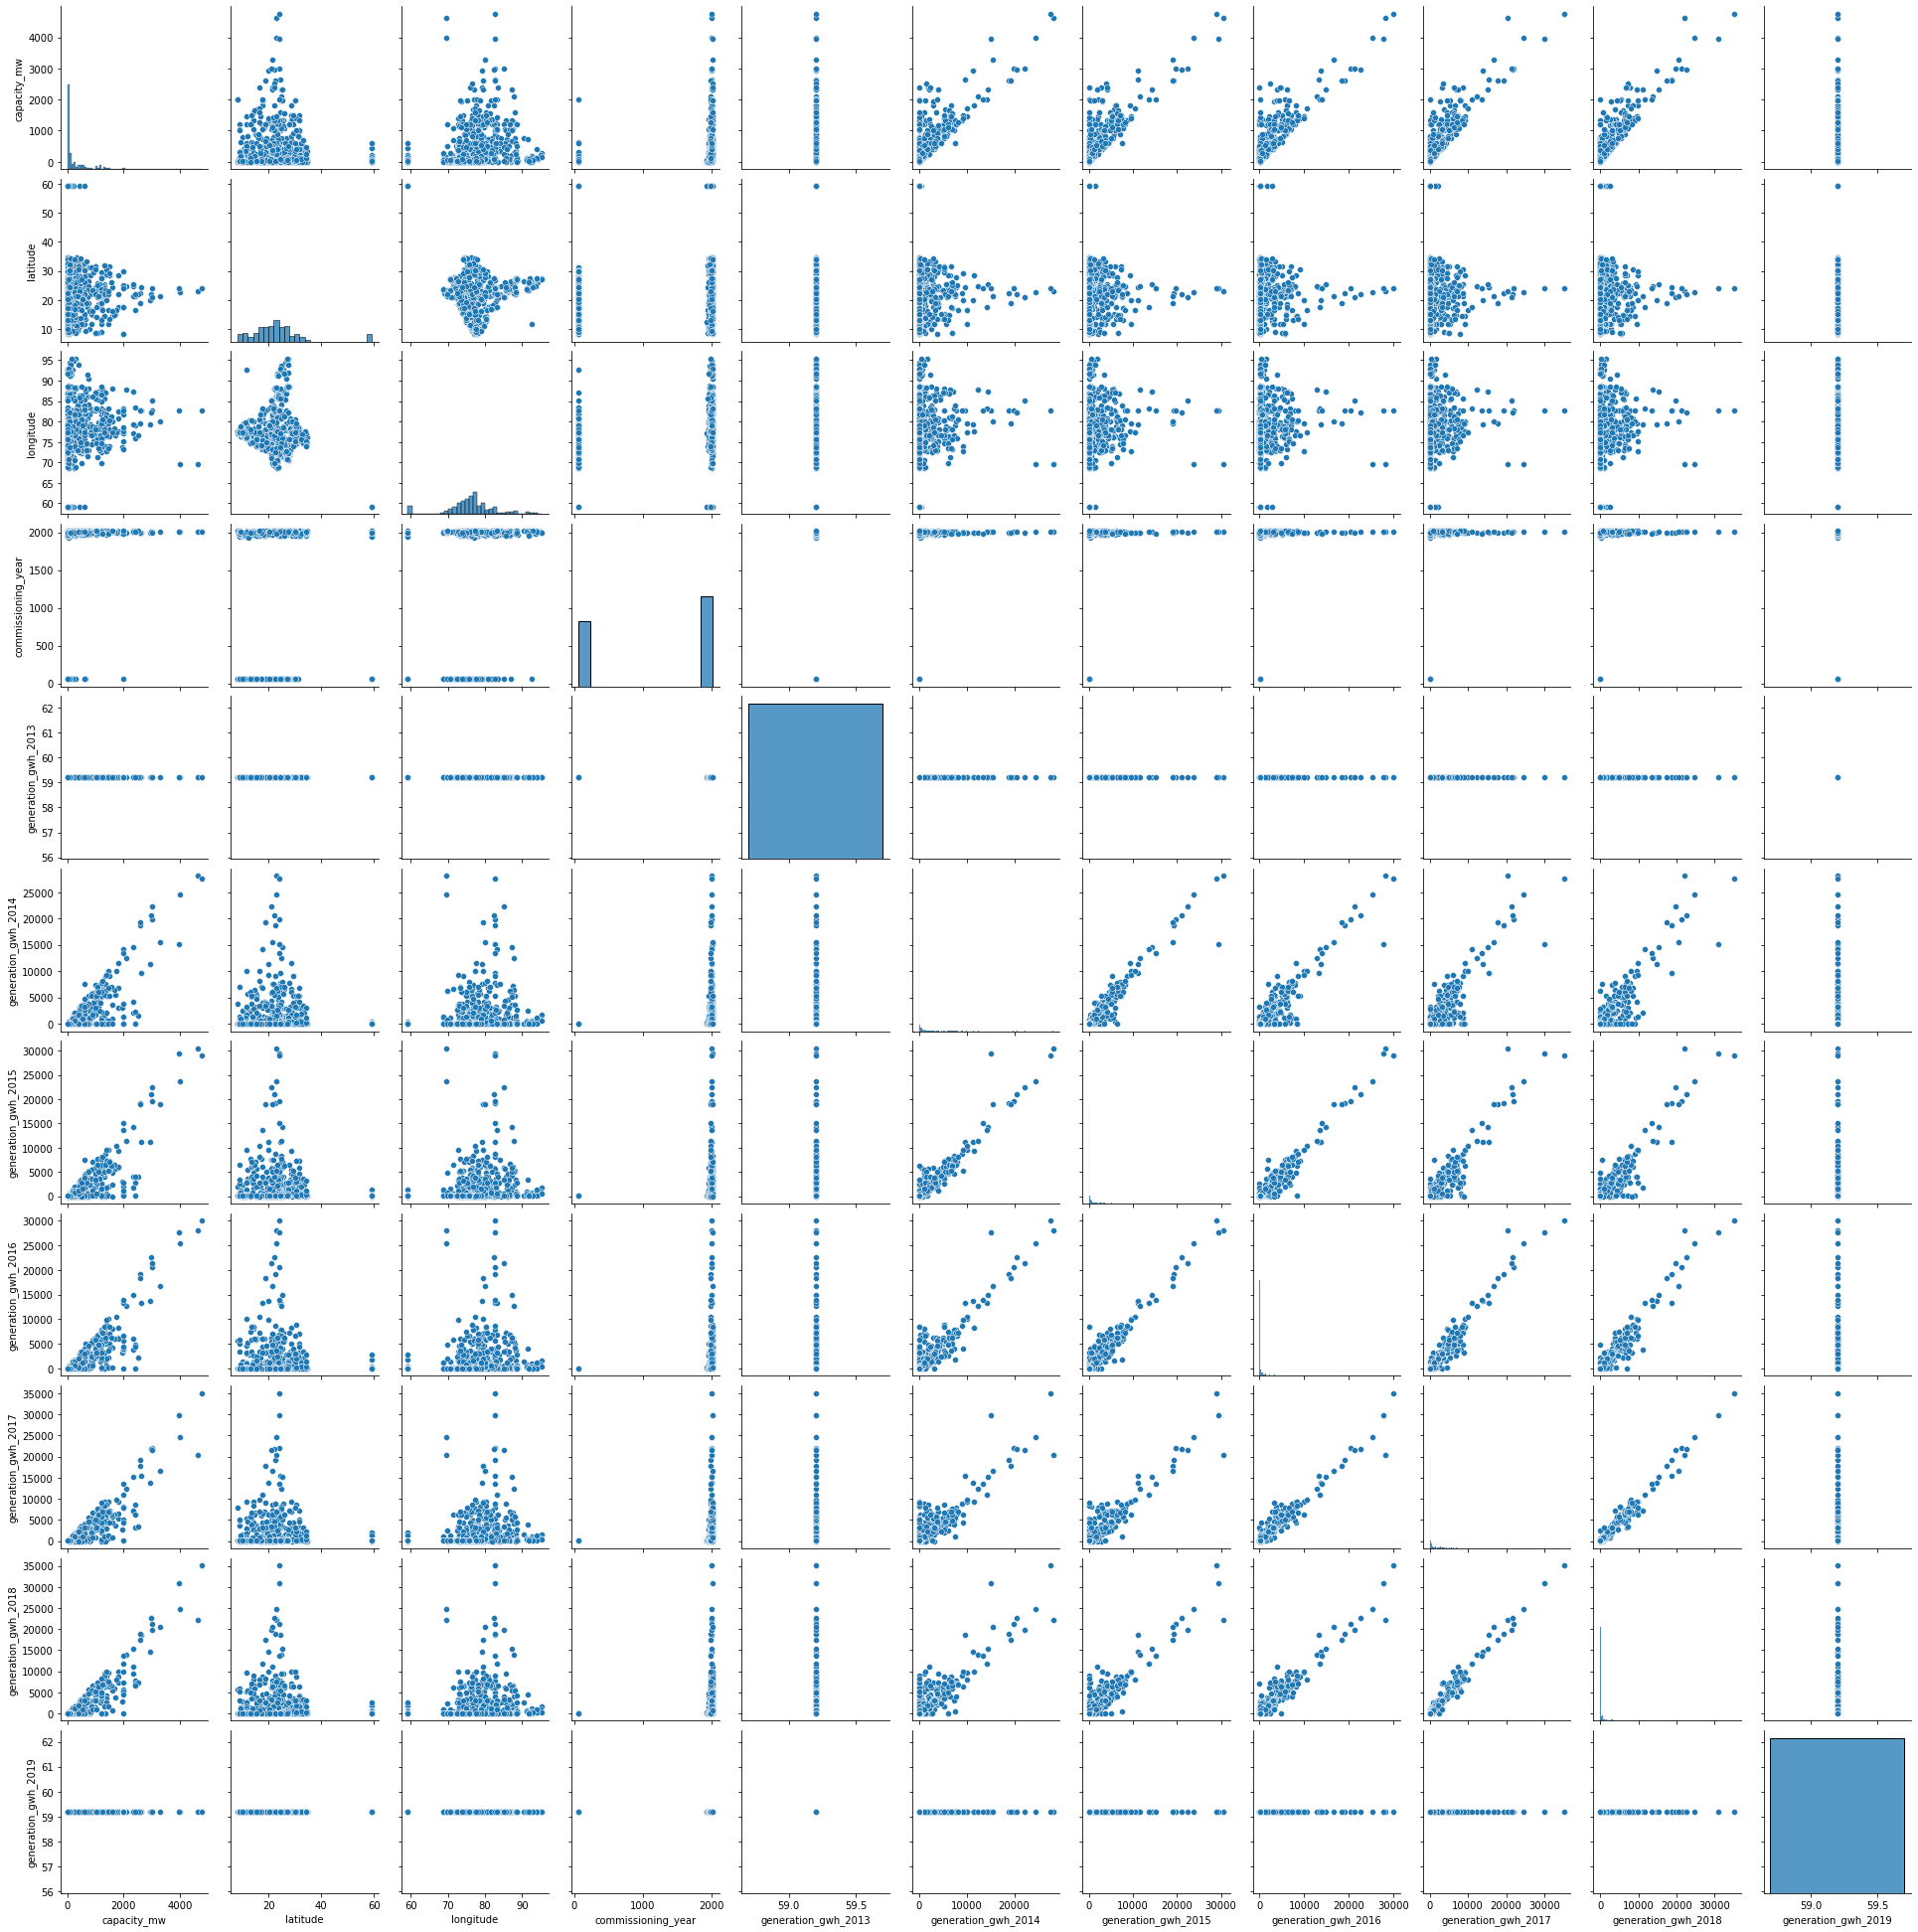

In [63]:
#checking the relation between each column.

sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

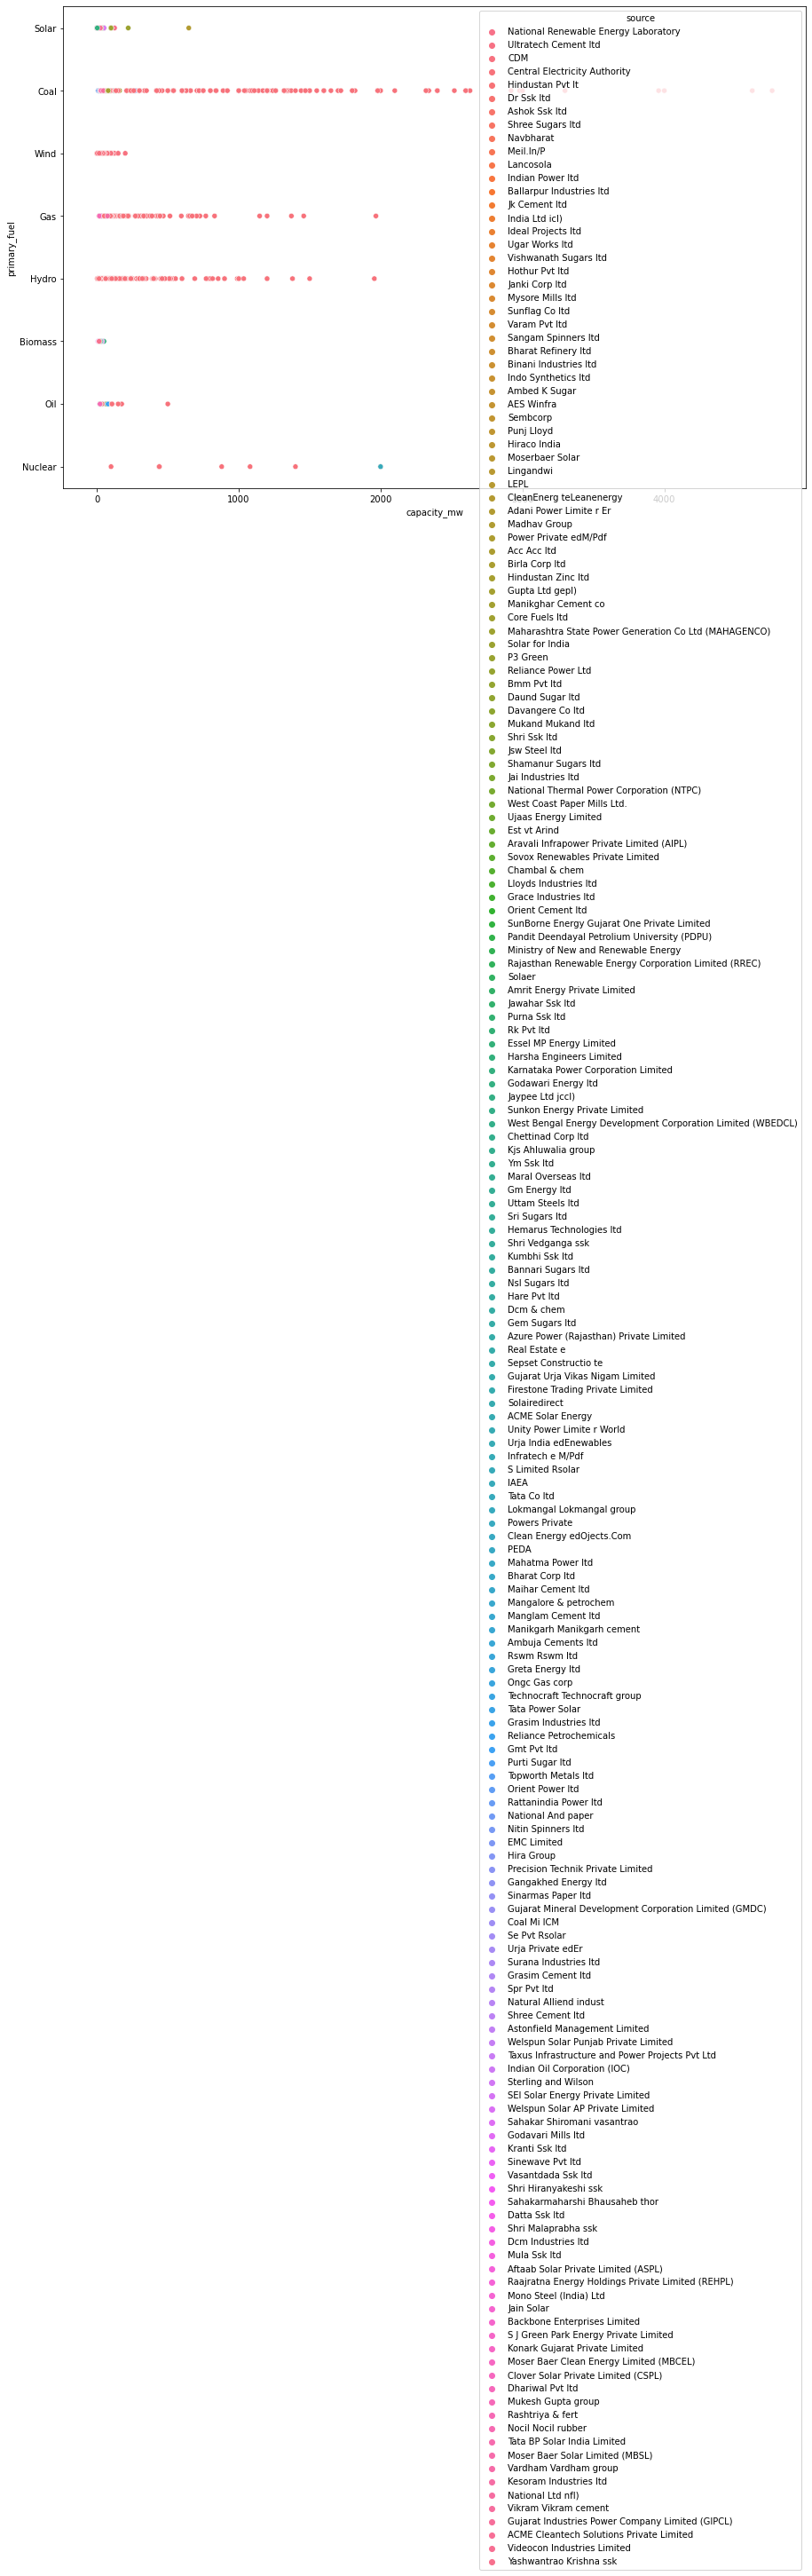

In [64]:
plt.figure(figsize=(15,10))
sns.scatterplot(x ="capacity_mw", y="primary_fuel", hue= "source", data = df)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

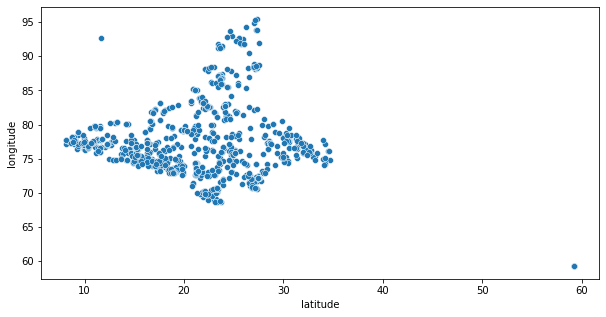

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ="latitude", y="longitude", data = df)

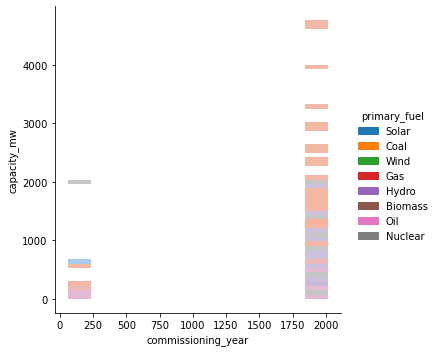

In [66]:
sns.displot(x ="commissioning_year", y="capacity_mw", hue= "primary_fuel", data = df)

In [67]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [68]:
df['primary_fuel'] = LE.fit_transform(df['primary_fuel'])

In [69]:
New_df=['country','name','gppd_idnr','country_long','url']
df=df.drop(columns=New_df,axis=1)

In [70]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
1,98.0,24.7663,74.6090,1,59.2,Ultratech Cement ltd,Ultratech Cement ltd,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
2,39.2,21.9038,69.3732,7,59.2,AES,CDM,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
3,135.0,23.8712,91.3602,2,2004.0,59.2,Central Electricity Authority,WRI,59.2,617.789264,843.747000,886.004428,663.774500,626.239128,59.2,Central Electricity Authority
4,1800.0,21.9603,82.4091,1,2015.0,59.2,Central Electricity Authority,WRI,59.2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,59.2,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.2,Central Electricity Authority,WRI,59.2,59.200000,0.994875,233.596650,865.400000,686.500000,59.2,Central Electricity Authority
903,3.0,12.8932,78.1654,6,59.2,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
904,25.5,15.2758,75.5811,7,59.2,59.2,CDM,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
905,80.0,24.3500,73.7477,1,59.2,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2


In [71]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,-0.053917,0.216974,-0.380395,0.414775,NaN,0.814674,0.841468,0.875369,0.892899,0.905488,NaN
latitude,-0.053917,1.000000,-0.500920,0.096464,0.088458,NaN,-0.029067,-0.030007,-0.031473,-0.024888,-0.028212,NaN
longitude,0.216974,-0.500920,1.000000,-0.348476,0.294825,NaN,0.160584,0.170438,0.186348,0.199703,0.199273,NaN
primary_fuel,-0.380395,0.096464,-0.348476,1.000000,-0.481713,NaN,-0.282791,-0.288032,-0.300822,-0.310594,-0.312084,NaN
commissioning_year,0.414775,0.088458,0.294825,-0.481713,1.000000,NaN,0.304853,0.304534,0.316274,0.325603,0.327190,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.814674,-0.029067,0.160584,-0.282791,0.304853,NaN,1.000000,0.966673,0.937892,0.907541,0.898658,NaN
generation_gwh_2015,0.841468,-0.030007,0.170438,-0.288032,0.304534,NaN,0.966673,1.000000,0.974653,0.943781,0.936566,NaN
generation_gwh_2016,0.875369,-0.031473,0.186348,-0.300822,0.316274,NaN,0.937892,0.974653,1.000000,0.976306,0.967607,NaN
generation_gwh_2017,0.892899,-0.024888,0.199703,-0.310594,0.325603,NaN,0.907541,0.943781,0.976306,1.000000,0.988031,NaN


<AxesSubplot:>

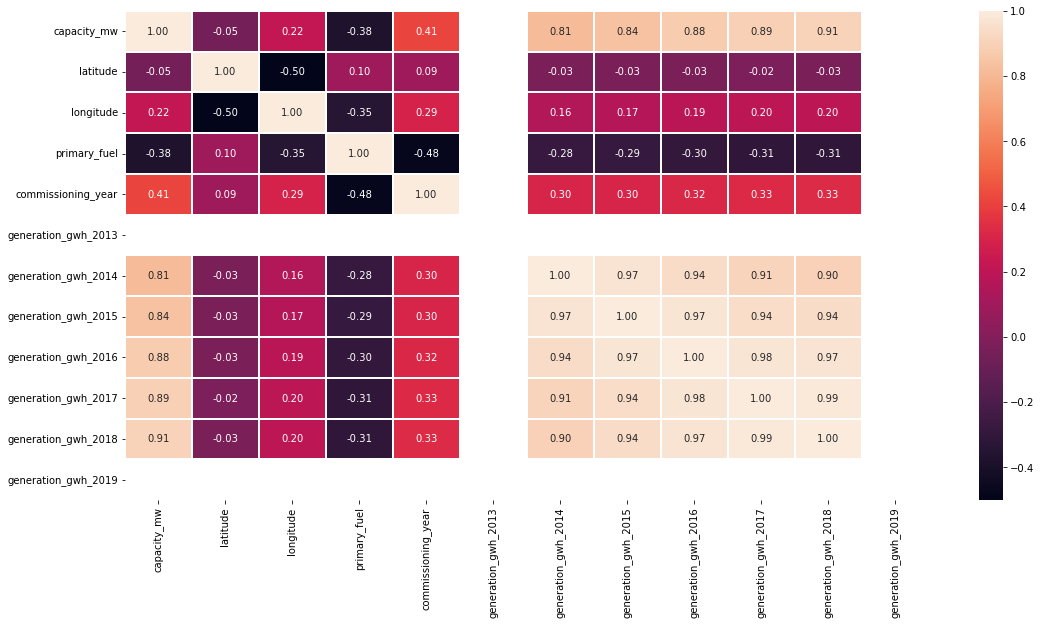

In [72]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), fmt ="0.2f", linewidth=0.1, annot=True)

In [73]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02
mean,326.223755,23.125256,76.538572,3.206174,1185.185226,5.920000e+01,1100.329205,1161.437454,1211.781915,1266.439354,1314.589897,5.920000e+01
std,590.085456,10.322840,6.263960,2.280652,956.750996,8.246843e-13,2914.072352,3094.143089,3119.562531,3175.490873,3286.682207,8.246843e-13
min,0.000000,8.168900,59.200000,0.000000,59.200000,5.920000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.920000e+01
25%,16.725000,17.072000,73.811550,1.000000,59.200000,5.920000e+01,59.200000,59.200000,59.200000,59.200000,59.200000,5.920000e+01
50%,59.200000,22.142100,76.493800,3.000000,1978.000000,5.920000e+01,59.200000,59.200000,59.200000,59.200000,59.200000,5.920000e+01
75%,385.250000,26.753750,79.206100,6.000000,2003.000000,5.920000e+01,556.562750,598.926350,670.039394,709.290725,687.754000,5.920000e+01
max,4760.000000,59.200000,95.408000,7.000000,2018.000000,5.920000e+01,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,5.920000e+01


In [74]:
df.shape

(907, 16)

In [75]:
df["primary_fuel"].unique()      #we will take primary_fuel as a target variable for classification model.

array([6, 1, 7, 2, 3, 0, 5, 4])

In [77]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019       float64
generation_data_source     object
dtype: object

# Checking outliers

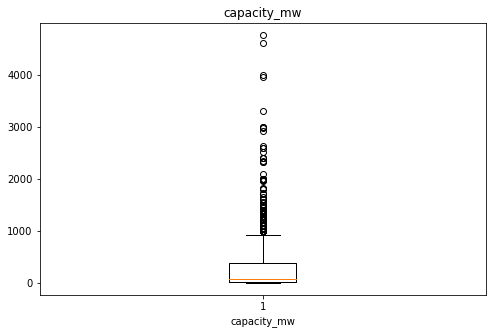

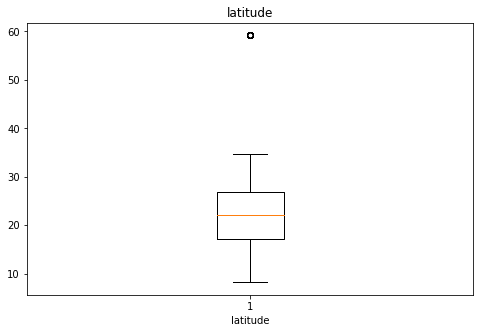

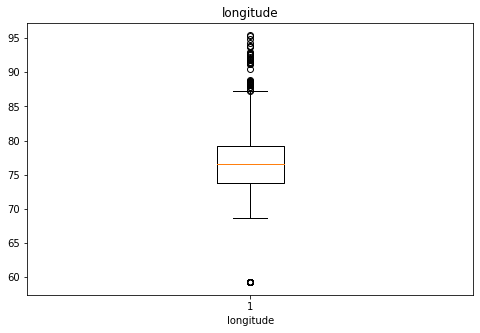

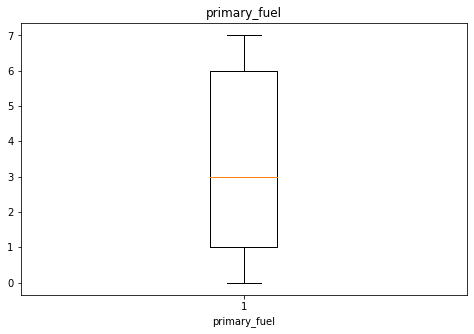

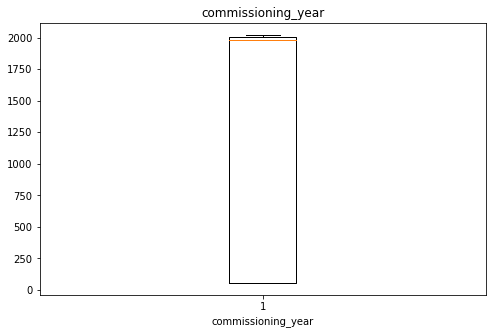

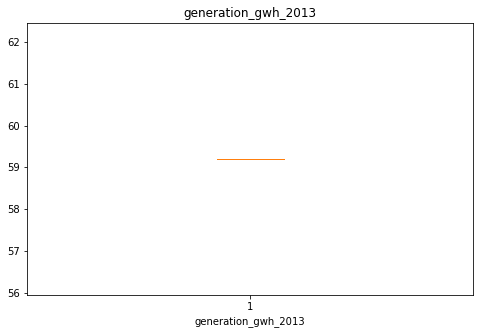

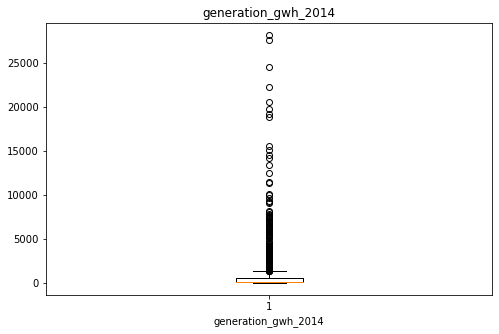

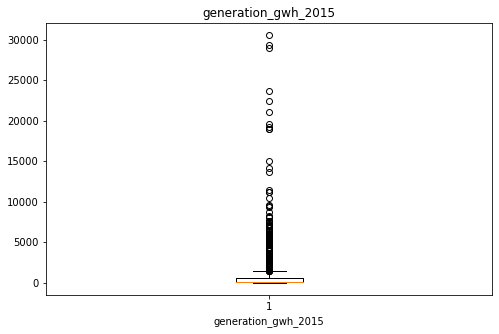

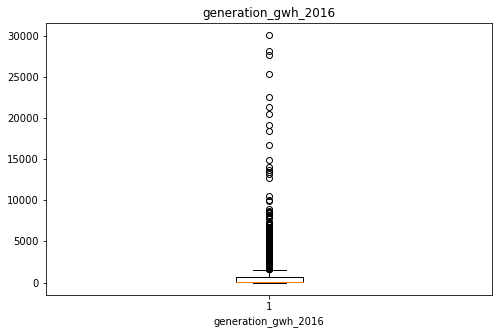

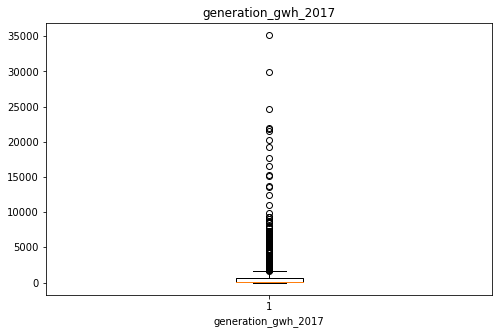

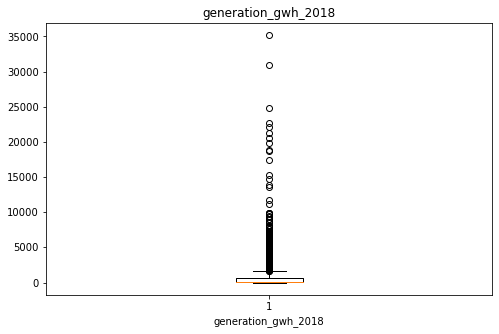

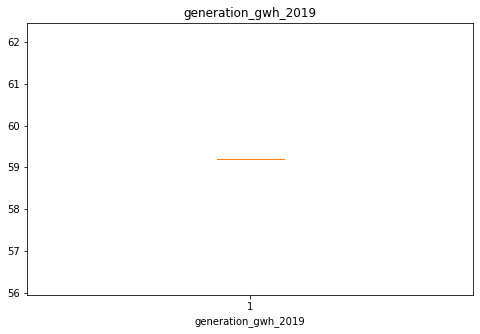

In [78]:
Col= ["capacity_mw", "latitude", "longitude", "primary_fuel","commissioning_year","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","generation_gwh_2019"]
for i in Col:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[i], vert=True)
    plt.title(i)
    plt.xlabel(i)
    plt.show()

In [80]:
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
generation_gwh_2013    0.000000
generation_gwh_2014    5.018549
generation_gwh_2015    5.292321
generation_gwh_2016    5.014692
generation_gwh_2017    5.010509
generation_gwh_2018    4.874039
generation_gwh_2019    0.000000
dtype: float64

In [81]:
df=df.drop(["generation_gwh_2015"], axis = 1)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
1,98.0,24.7663,74.6090,1,59.2,Ultratech Cement ltd,Ultratech Cement ltd,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
2,39.2,21.9038,69.3732,7,59.2,AES,CDM,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
3,135.0,23.8712,91.3602,2,2004.0,59.2,Central Electricity Authority,WRI,59.2,617.789264,886.004428,663.774500,626.239128,59.2,Central Electricity Authority
4,1800.0,21.9603,82.4091,1,2015.0,59.2,Central Electricity Authority,WRI,59.2,3035.550000,6243.000000,5385.579736,7279.000000,59.2,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.2,Central Electricity Authority,WRI,59.2,59.200000,233.596650,865.400000,686.500000,59.2,Central Electricity Authority
903,3.0,12.8932,78.1654,6,59.2,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
904,25.5,15.2758,75.5811,7,59.2,59.2,CDM,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
905,80.0,24.3500,73.7477,1,59.2,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2


Now, we will remove the outliers present in the dataset and clean the data using zscore method.

In [82]:
import numpy as np
from scipy.stats import zscore

In [83]:
cols = df[["capacity_mw", "latitude", "longitude", "generation_gwh_2014", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]]
z = np.abs(zscore(cols))


In [84]:
z

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.490314,0.526774,0.357473,0.369673,0.380384,0.382173
1,0.386977,0.159060,0.308213,0.357473,0.369673,0.380384,0.382173
2,0.486679,0.118391,1.144536,0.357473,0.369673,0.380384,0.382173
3,0.324240,0.072301,2.367481,0.165681,0.104488,0.189891,0.209552
4,2.498942,0.112915,0.937708,0.664461,1.613686,1.297882,1.815722
...,...,...,...,...,...,...,...
902,2.159821,0.662039,0.130697,0.357473,0.313738,0.126362,0.191207
903,0.548060,0.991752,0.259856,0.357473,0.369673,0.380384,0.382173
904,0.509909,0.760817,0.152938,0.357473,0.369673,0.380384,0.382173
905,0.417498,0.118710,0.445790,0.357473,0.369673,0.380384,0.382173


In [85]:
new_data =df[(z<3).all(axis=1)]
new_data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
1,98.0,24.7663,74.6090,1,59.2,Ultratech Cement ltd,Ultratech Cement ltd,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
2,39.2,21.9038,69.3732,7,59.2,AES,CDM,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
3,135.0,23.8712,91.3602,2,2004.0,59.2,Central Electricity Authority,WRI,59.2,617.789264,886.004428,663.774500,626.239128,59.2,Central Electricity Authority
4,1800.0,21.9603,82.4091,1,2015.0,59.2,Central Electricity Authority,WRI,59.2,3035.550000,6243.000000,5385.579736,7279.000000,59.2,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.2,Central Electricity Authority,WRI,59.2,59.200000,233.596650,865.400000,686.500000,59.2,Central Electricity Authority
903,3.0,12.8932,78.1654,6,59.2,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
904,25.5,15.2758,75.5811,7,59.2,59.2,CDM,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2
905,80.0,24.3500,73.7477,1,59.2,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,59.2,59.200000,59.200000,59.200000,59.200000,59.2,59.2


In [86]:
new_data.shape

(834, 15)

In [87]:
dataloss=(907-834)/907*100 
dataloss

8.04851157662624

In [88]:
new_data.skew()

capacity_mw            1.977979
latitude              -0.131057
longitude              1.133833
primary_fuel           0.457654
commissioning_year    -0.251275
generation_gwh_2013    0.000000
generation_gwh_2014    2.787438
generation_gwh_2016    2.567362
generation_gwh_2017    2.478295
generation_gwh_2018    2.530539
generation_gwh_2019    0.000000
dtype: float64

In [89]:
from sklearn.preprocessing import PowerTransformer

In [92]:
Col = ["capacity_mw", "latitude", "longitude", "generation_gwh_2014", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]

New_df = pd.DataFrame(df,columns=Col)

PT = PowerTransformer(method='yeo-johnson')
New_df[Col] = PT.fit_transform(New_df[Col].values)
New_df[Col].head()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,0.714294,-0.555026,-0.476612,-0.495756,-0.500284,-0.500906
1,0.193694,0.396480,-0.340637,-0.476612,-0.495756,-0.500284,-0.500906
2,-0.292337,0.090479,-1.143832,-0.476612,-0.495756,-0.500284,-0.500906
3,0.360998,0.305174,2.536669,0.728652,0.848300,0.678482,0.624972
4,1.649503,0.096936,0.941460,1.484548,1.737912,1.636981,1.752415


After applying the powertransformer method, let's recheck if all skewness removed or not.

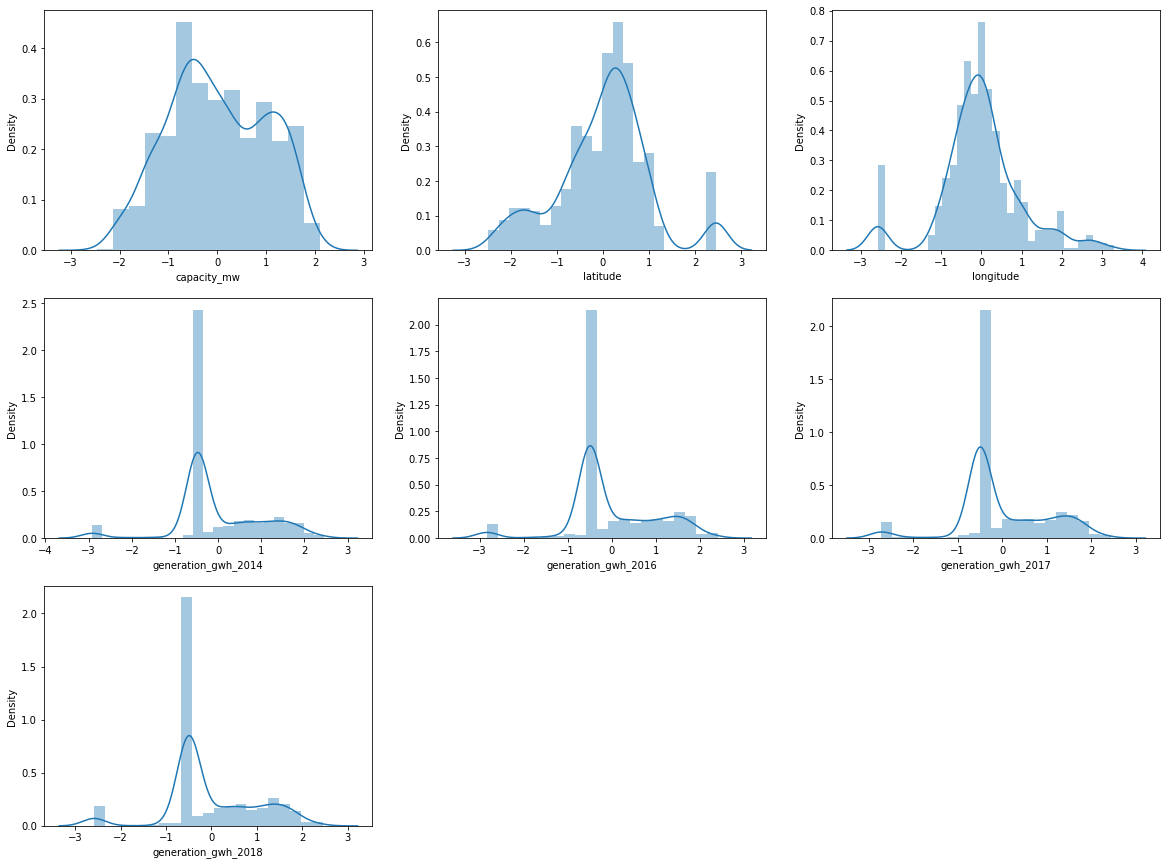

In [93]:
plt.subplots(figsize=(20, 15))
for i, column in enumerate(New_df):
    plt.subplot(3,3, i + 1)
    sns.distplot(New_df[column])
plt.show()

In [94]:
# Lets drop unnecessary column
drop=["generation_data_source"]
df=df.drop(columns=drop,axis=1)

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

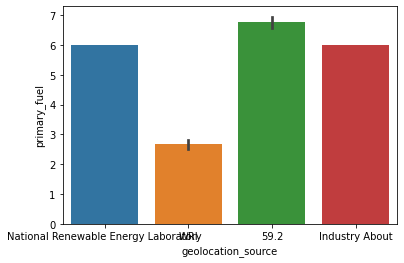

In [95]:
sns.barplot(x= "geolocation_source",y= "primary_fuel" ,data=df)

In [111]:
df.drop(columns = ["geolocation_source"], inplace=True)

Now, lets test the datas

In [113]:
X= df.drop("primary_fuel", axis =1)
y_fuel=df["primary_fuel"]
X

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,2011.0,59.2,59.200000,59.200000,59.200000,59.200000,59.2
1,98.0,24.7663,74.6090,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.2
2,39.2,21.9038,69.3732,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.2
3,135.0,23.8712,91.3602,2004.0,59.2,617.789264,886.004428,663.774500,626.239128,59.2
4,1800.0,21.9603,82.4091,2015.0,59.2,3035.550000,6243.000000,5385.579736,7279.000000,59.2
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,59.2,59.200000,233.596650,865.400000,686.500000,59.2
903,3.0,12.8932,78.1654,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.2
904,25.5,15.2758,75.5811,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.2
905,80.0,24.3500,73.7477,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.2


In [114]:
y_fuel

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [115]:
X = df.drop("capacity_mw", axis=1)
y_capacity = df["capacity_mw"]

In [116]:
y_capacity

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

Now, let's begin with building & testing classification model on the dataset for fuel & capacity prediction

In [117]:
from sklearn.ensemble import RandomForestClassifier
Rf_fuel = RandomForestClassifier()
from sklearn.linear_model import LinearRegression
LR_fuel = LinearRegression()

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [119]:
for i in range(0,100):
    X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.2, random_state=i)
    Rf_fuel.fit(X_train, y_train_fuel)
    predicted_train=Rf_fuel.predict(X_train)
    predicted_test=Rf_fuel.predict(X_test)
    print(f'At random state {i},the training accuracy is:- {r2_score(y_train_fuel,predicted_train)}')
    print(f'At random state {i},the testing accuracy is:- {r2_score(y_test_fuel,predicted_test)}')
    print('\n')

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 0.9990120722598576


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 0.9977280103862383


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 0.991933288166501


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 0.9989248074105581


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 0.9958790197954228


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- 1.0


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 0.9931691938147426


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 0.9890850208903904


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing accuracy is:- 0.997970471

At random state 75,the training accuracy is:- 1.0
At random state 75,the testing accuracy is:- 0.9989527952311906


At random state 76,the training accuracy is:- 1.0
At random state 76,the testing accuracy is:- 0.9988874557580277


At random state 77,the training accuracy is:- 1.0
At random state 77,the testing accuracy is:- 0.9970595838180173


At random state 78,the training accuracy is:- 1.0
At random state 78,the testing accuracy is:- 1.0


At random state 79,the training accuracy is:- 1.0
At random state 79,the testing accuracy is:- 0.9988926476672588


At random state 80,the training accuracy is:- 1.0
At random state 80,the testing accuracy is:- 0.9957494511653977


At random state 81,the training accuracy is:- 1.0
At random state 81,the testing accuracy is:- 0.9958962101952119


At random state 82,the training accuracy is:- 1.0
At random state 82,the testing accuracy is:- 0.9952774191874306


At random state 83,the training accuracy is:- 1.0
At random state 83,the testing accura

In [153]:
X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.2, random_state=71)
Rf_fuel.fit(X_train, y_train_fuel)

RandomForestClassifier()

In [144]:
for i in range(0,100):
    X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.2, random_state=i)
    LR_fuel.fit(X_train, y_train_fuel)
    predicted_lr_train=LR_fuel.predict(X_train)
    predicted_lr_test=LR_fuel.predict(X_test)
    print(f'At random state {i},the training accuracy is:- {r2_score(y_train_fuel,predicted_lr_train)}')
    print(f'At random state {i},the testing accuracy is:- {r2_score(y_test_fuel,predicted_lr_test)}')
    print('\n')

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 1.0


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 1.0


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 1.0


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 1.0


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 1.0


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- 1.0


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 1.0


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 1.0


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing accuracy is:- 1.0


At random state 9,the training accuracy is:- 1.0
At random state 9,the testing accuracy is:- 1.0


At random 

At random state 91,the training accuracy is:- 1.0
At random state 91,the testing accuracy is:- 1.0


At random state 92,the training accuracy is:- 1.0
At random state 92,the testing accuracy is:- 1.0


At random state 93,the training accuracy is:- 1.0
At random state 93,the testing accuracy is:- 1.0


At random state 94,the training accuracy is:- 1.0
At random state 94,the testing accuracy is:- 1.0


At random state 95,the training accuracy is:- 1.0
At random state 95,the testing accuracy is:- 1.0


At random state 96,the training accuracy is:- 1.0
At random state 96,the testing accuracy is:- 1.0


At random state 97,the training accuracy is:- 1.0
At random state 97,the testing accuracy is:- 1.0


At random state 98,the training accuracy is:- 1.0
At random state 98,the testing accuracy is:- 1.0


At random state 99,the training accuracy is:- 1.0
At random state 99,the testing accuracy is:- 1.0




In [145]:
X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.2, random_state=42)
LR_fuel.fit(X_train, y_train_fuel)

LinearRegression()

In [146]:
from sklearn.ensemble import RandomForestRegressor
RF_capacity = RandomForestRegressor()

In [147]:
LR_capacity = LinearRegression()

In [148]:
for i in range(0,100):
    X_train, X_test, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=i)
    RF_capacity.fit(X_train, y_train_capacity)
    predict_train=RF_capacity.predict(X_train)
    predict_test=RF_capacity.predict(X_test)
    print(f'At random state {i},the training accuracy is:- {r2_score(y_train_capacity,predict_train)}')
    print(f'At random state {i},the testing accuracy is:- {r2_score(y_test_capacity,predict_test)}')
    print('\n')

At random state 0,the training accuracy is:- 0.9786757725684742
At random state 0,the testing accuracy is:- 0.9257661590610935


At random state 1,the training accuracy is:- 0.9806597105866651
At random state 1,the testing accuracy is:- 0.8806065831271542


At random state 2,the training accuracy is:- 0.9826037462974665
At random state 2,the testing accuracy is:- 0.8200271211118384


At random state 3,the training accuracy is:- 0.979425878345546
At random state 3,the testing accuracy is:- 0.8745061573395855


At random state 4,the training accuracy is:- 0.9794524681986522
At random state 4,the testing accuracy is:- 0.9205281722031807


At random state 5,the training accuracy is:- 0.9793865488624616
At random state 5,the testing accuracy is:- 0.884595760568308


At random state 6,the training accuracy is:- 0.980345361244622
At random state 6,the testing accuracy is:- 0.8557039300307117


At random state 7,the training accuracy is:- 0.9850512190291767
At random state 7,the testing accura

At random state 63,the training accuracy is:- 0.9798198654221563
At random state 63,the testing accuracy is:- 0.8990602266858682


At random state 64,the training accuracy is:- 0.9770091350104855
At random state 64,the testing accuracy is:- 0.8890276432225421


At random state 65,the training accuracy is:- 0.9834916804837641
At random state 65,the testing accuracy is:- 0.8368286398190534


At random state 66,the training accuracy is:- 0.9803269618394049
At random state 66,the testing accuracy is:- 0.8216746446866723


At random state 67,the training accuracy is:- 0.9810865327482123
At random state 67,the testing accuracy is:- 0.836682380555445


At random state 68,the training accuracy is:- 0.9828936173967434
At random state 68,the testing accuracy is:- 0.7511702972043763


At random state 69,the training accuracy is:- 0.9829494007133508
At random state 69,the testing accuracy is:- 0.8453052535402364


At random state 70,the training accuracy is:- 0.9809797226454773
At random state 70,

In [158]:
X_train, X_test, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=98)
RF_capacity.fit(X_train, y_train_capacity)

RandomForestRegressor()

In [149]:
for i in range(0,100):
    X_train, X_test, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=i)
    LR_capacity.fit(X_train, y_train_capacity)
    predict_LR_train=LR_capacity.predict(X_train)
    predict_LR_test=LR_capacity.predict(X_test)
    print(f'At random state {i},the training accuracy is:- {r2_score(y_train_capacity,predict_LR_train)}')
    print(f'At random state {i},the testing accuracy is:- {r2_score(y_test_capacity,predict_LR_test)}')
    print('\n')

At random state 0,the training accuracy is:- 0.8178105555883252
At random state 0,the testing accuracy is:- 0.8987675060282788


At random state 1,the training accuracy is:- 0.8379558772829632
At random state 1,the testing accuracy is:- 0.8494534873104473


At random state 2,the training accuracy is:- 0.8461026237117484
At random state 2,the testing accuracy is:- 0.8140504834514081


At random state 3,the training accuracy is:- 0.8409010959518474
At random state 3,the testing accuracy is:- 0.833771647788719


At random state 4,the training accuracy is:- 0.8324345850162174
At random state 4,the testing accuracy is:- 0.8678770044500328


At random state 5,the training accuracy is:- 0.8399289817842929
At random state 5,the testing accuracy is:- 0.8380356543322947


At random state 6,the training accuracy is:- 0.8513664505425096
At random state 6,the testing accuracy is:- 0.7901273976374943


At random state 7,the training accuracy is:- 0.851483736958772
At random state 7,the testing accur

At random state 65,the testing accuracy is:- 0.7828909103099138


At random state 66,the training accuracy is:- 0.8492554969352175
At random state 66,the testing accuracy is:- 0.7872731864755795


At random state 67,the training accuracy is:- 0.8403208871065335
At random state 67,the testing accuracy is:- 0.8348256791079219


At random state 68,the training accuracy is:- 0.8667176108804218
At random state 68,the testing accuracy is:- 0.6662175236965968


At random state 69,the training accuracy is:- 0.8447812598236719
At random state 69,the testing accuracy is:- 0.8231556628769919


At random state 70,the training accuracy is:- 0.8297262519685245
At random state 70,the testing accuracy is:- 0.8787343624528707


At random state 71,the training accuracy is:- 0.8517368907494776
At random state 71,the testing accuracy is:- 0.7853909675993676


At random state 72,the training accuracy is:- 0.8381498124415035
At random state 72,the testing accuracy is:- 0.8477343506764806


At random state 7

In [150]:
X_train, X_test, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=96)
LR_capacity.fit(X_train, y_train_capacity)

LinearRegression()

Evaluating models for underfitting/overfitting and performance metrics

In [180]:
from sklearn.metrics import mean_squared_error

fuel_mse_linear_reg = mean_squared_error(y_test_fuel, predicted_lr_test)

In [182]:
fuel_accuracy_rf = accuracy_score(y_test_fuel, predicted_test)

In [183]:
predicted_test = Rf_fuel.predict(X_test)

In [184]:
print(Rf_fuel.score(X_train,y_train_fuel))
Rf_predict=Rf_fuel.predict(X_test)
Rf_train=Rf_fuel.predict(X_train)

0.19310344827586207


In [163]:
predicted_lr_train = LR_fuel.predict(X_test)

In [164]:
print(LR_fuel.score(X_train,y_train_fuel))
LR_predict=LR_fuel.predict(X_test)
LR_train=LR_fuel.predict(X_train)

-0.9780975160293306


In [159]:
predict_train = RF_capacity.predict(X_test)

In [160]:
print(RF_capacity.score(X_train,y_train_capacity))
RF_predict=RF_capacity.predict(X_test)
RF_train=RF_capacity.predict(X_train)

0.9794085450193918


In [165]:
predict_LR_train = LR_capacity.predict(X_test)

In [166]:
print(LR_capacity.score(X_train,y_train_capacity))
Lr_predict=LR_capacity.predict(X_test)
Lr_train=LR_capacity.predict(X_train)

0.8290715396979437


In [167]:
capacity_rmse_rf = mean_squared_error(y_test_capacity, predict_train, squared=False)
capacity_rmse_Lr = mean_squared_error(y_test_capacity, predict_LR_train, squared=False)

In [168]:
from sklearn.model_selection import cross_val_score

In [175]:
#Now we'll do the Cross validation of the models
Rf_train_accuracy=r2_score(y_train_fuel,predicted_train)
Rf_test_accuracy=r2_score(y_test_fuel,predicted_test)

for a in range(2,10):
    cross_v_score=cross_val_score(Rf_fuel,X,y_fuel,cv=a)
    cv_mean=cross_v_score.mean()
    print(f'At cross fold {a} the cv score is {cv_mean*100} and accuracy score for training is {Rf_train_accuracy} and accuracy for the testing is {Rf_test_accuracy}')
    print('\n')


At cross fold 2 the cv score is 98.45620484095264 and accuracy score for training is -1.0484980966107673 and accuracy for the testing is -0.9484705882352937


At cross fold 3 the cv score is 99.22883016778499 and accuracy score for training is -1.0484980966107673 and accuracy for the testing is -0.9484705882352937


At cross fold 4 the cv score is 99.22907488986785 and accuracy score for training is -1.0484980966107673 and accuracy for the testing is -0.9484705882352937


At cross fold 5 the cv score is 99.22894784773237 and accuracy score for training is -1.0484980966107673 and accuracy for the testing is -0.9484705882352937


At cross fold 6 the cv score is 99.22882537469503 and accuracy score for training is -1.0484980966107673 and accuracy for the testing is -0.9484705882352937


At cross fold 7 the cv score is 99.22991736945225 and accuracy score for training is -1.0484980966107673 and accuracy for the testing is -0.9484705882352937


At cross fold 8 the cv score is 99.22954510169

In [178]:
rf_scores = cross_val_score(Rf_fuel, X, y_fuel, cv=5)
lr_scores = cross_val_score(LR_fuel,X, y_fuel, cv=5)
RF_scores = cross_val_score(RF_capacity, X, y_capacity, cv=5)
LR_scores = cross_val_score(LR_capacity, X, y_capacity, cv=5)

In [185]:
print("Fuel Prediction:")
print("Random Forest Accuracy:", fuel_accuracy_rf)
print("Linear Regression Mean Squared Error:", fuel_mse_linear_reg)
print("\nCapacity Prediction:")
print("Random Forest RMSE:", capacity_rmse_rf)
print("Linear Regression RMSE:", capacity_rmse_Lr)

Fuel Prediction:
Random Forest Accuracy: 0.2032967032967033
Linear Regression Mean Squared Error: 9.307692307691406

Capacity Prediction:
Random Forest RMSE: 212.43650079085725
Linear Regression RMSE: 208.44785637705945


Now, we will select the best performing model based on metrics

In [186]:
best_model_fuel = Rf_fuel if fuel_accuracy_rf > fuel_mse_linear_reg else LR_fuel
best_model_capacity = RF_capacity if capacity_rmse_rf < capacity_rmse_Lr else LR_capacity

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
parameter_grid_Rf={'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10],}
GCV_Rf_fuel = GridSearchCV(Rf_fuel, parameter_grid_Rf, cv=5)
GCV_Rf_fuel.fit(X, y_fuel)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['none', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [189]:
GCV_RF_capacity = GridSearchCV(RF_capacity, parameter_grid_Rf, cv=5)
GCV_RF_capacity.fit(X, y_capacity)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['none', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [190]:
best_model_fuel = GCV_Rf_fuel.best_estimator_
best_model_capacity = GCV_RF_capacity.best_estimator_

print("Best Fuel Hyper-parameters:", best_model_fuel)
print("Best Capacity Hyper-parameters:", best_model_capacity)

Best Fuel Hyper-parameters: RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200)
Best Capacity Hyper-parameters: RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=200)


In [209]:
from sklearn.metrics import mean_absolute_error

In [210]:
best_model_fuel = {'n_estimators': 200, 'max_depth': None,'random_state': 71}

Rf_fuel = RandomForestClassifier(**best_model_fuel)
Rf_fuel.fit(X_train, y_train_fuel)
Rf_fuel.score(X_train, y_train_fuel)
# Evaluating the model on the test set
predicted_test = Rf_fuel.predict(X_test)
MAE = mean_absolute_error(y_test_fuel, predicted_test)
MSE = mean_squared_error(y_test_fuel, predicted_test)
r2 = r2_score(y_test_fuel, predicted_test)
print("Best Model (Fuel) - Random Forest Classifier")
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("R-squared:", r2*100)

Best Model (Fuel) - Random Forest Classifier
Mean Absolute Error: 2.3956043956043955
Mean Squared Error: 9.747252747252746
R-squared: -89.92235294117643


In [212]:
best_model_capacity = {'n_estimators': 200,'max_depth': 10, 'min_samples_split': 2, 'random_state': 98}

RF_capacity = RandomForestRegressor(**best_model_capacity)
RF_capacity.fit(X_train, y_train_capacity)
RF_capacity.score(X_train, y_train_capacity)
# Evaluate the model on the test set
predict_test = RF_capacity.predict(X_test)
Mae = mean_absolute_error(y_test_capacity, predict_test)
r2 = r2_score(y_test_capacity, predict_test)
print("Best Model(Capacity) - Random Forest Regressor")
print("Mean Squared Error:", Mae)
print("R-squared:", r2*100)

Best Model(Capacity) - Random Forest Regressor
Mean Squared Error: 118.55163748625549
R-squared: 88.52469305831251


In [213]:
import joblib
joblib.dump(RF_capacity, "Global_Power_Plant_Database_Capacity.pkl")

['Global_Power_Plant_Database_Capacity.pkl']

In [214]:
joblib.dump(Rf_fuel, "Global_Power_Plant_Database_Fuel.pkl")

['Global_Power_Plant_Database_Fuel.pkl']

In [215]:
new_Rf = joblib.load(open("Global_Power_Plant_Database_Capacity.pkl",'rb'))
result=new_Rf.score(X_test,y_test_capacity)
print(result*100)

88.52469305831251


In [216]:
new_RF = joblib.load(open("Global_Power_Plant_Database_Fuel.pkl",'rb'))
result=new_RF.score(X_test,y_test_fuel)
print(result*100)

23.076923076923077


In [217]:
Df_New = pd.DataFrame([new_Rf.predict(X_test)[:],predicted_test[:]],index=['Predicted','Original'])
Df_New

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,719.757677,101.639766,21.69385,534.302254,611.363297,29.735958,29.606614,1219.19819,22.103005,71.138382,...,20.322217,141.086554,22.644546,880.017185,453.489516,156.568448,29.510581,29.614873,332.700757,897.838482
Original,3.000000,3.000000,7.00000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,...,7.000000,1.000000,1.000000,1.000000,3.000000,1.000000,7.000000,3.000000,3.000000,3.000000
